14
74
29252


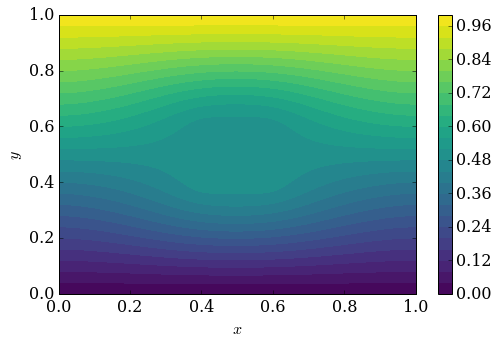

In [13]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# resolution 
nx=150
ny=150

#box of length l and height h
l=1
h=1

#speed of the flow u
u=1

x=numpy.linspace(0,l,nx)
y=numpy.linspace(0,h,ny)

dx=l/(nx-1)
dy=h/(ny-1)
l1_target = 1e-6


w=numpy.zeros((nx,ny))
psi=numpy.zeros((nx,ny))


psi[:,0]=u*y[:]
psi[:,-1]=u*y[:]
psi[-1,:]=u*y[-1]
psi[0,:]=u*y[0]

def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

def stokes_system(h,nx,ny,w,psi,l1_target,dx,dy,u,y):
    '''Performs Jacobi relaxation for the cavity flow
    
    Parameters:
    ----------
    w : 2D array of floats
        Initial guess
    psi: 2D array of floats
        Initial guess
    dx: float
        Mesh spacing in x direction
    dy: float
        Mesh spacing in y direction
    l1_target: float
        Target difference between two consecutive iterates
    
    Returns:
    -------
    psi: 2D array of float
        Distribution after relaxation
    iteration: number of iteration
    ''' 
    iteration=0
    stop1=1
    stop2=1
    
    xi=int((nx-1)/2)
    yi=int((ny-1)/2)
    r=int((nx-1)/10)
    print(r)
    print(xi)
    
    psin = numpy.empty_like(psi)
    wn= numpy.empty_like(w)
    
    while(stop1>l1_target or stop2>l1_target):
        
        psin=psi.copy()
        wn=w.copy()
        w[1:-1,1:-1]=.25*(wn[2:,1:-1]+wn[:-2,1:-1]+w[1:-1,:-2]+wn[1:-1,2:])
        
        psi[1:-1:,1:-1]=.25*((dx**2)*wn[1:-1,1:-1]+psin[2:,1:-1] \
                             +psin[:-2,1:-1]+psi[1:-1,:-2]+psin[1:-1,2:]) 
        
        #BCs
        
        w[-1,:]= (-1/dx**2)*(6*dy*u-7*psi[-1,:]+8*psi[-2,:]-psi[-3,:])
        w[0,:]= (-1/dx**2)*(-6*dy*u-7*psi[0,:]+8*psi[1,:]-psi[2,:])
        w[:,0]= (-1/dx**2)*(-7*psi[:,0]+8*psi[:,1]-psi[:,2])
        w[:,-1]= (-1/dx**2)*(-7*psi[:,-1]+8*psi[:,-2]-psi[:,-3])
        
        w[yi-r,xi-r:xi+r+1]=(-1/(2*(dy)**2))*(8*psi[yi-r-1,xi-r:xi+r+1]-7*h/2*u-psi[yi-r-2,xi-r:xi+r+1])
        w[yi-r:yi+r+1,xi-r]=(-1/(2*(dy)**2))*(8*psi[yi-r:yi+r+1,xi-r-1]-7*h/2*u-psi[yi-r:yi+r+1,xi-r-2])
        w[yi+r,xi-r:xi+r+1]=(-1/(2*(dy)**2))*(8*psi[yi+r+1,xi-r:xi+r+1]-7*h/2*u-psi[yi+r+2,xi-r:xi+r+1])
        w[yi-r:yi+r+1,xi+r]=(-1/(2*(dy)**2))*(8*psi[yi-r:yi+r+1,xi+r+1]-7*h/2*u-psi[yi-r:yi+r+1,xi+r+2])
        
        stop1=L1norm(psi,psin)
        stop2=L1norm(w,wn)
        iteration+=1
        
    return psi, iteration

psi,iteration = stokes_system(h,nx,ny,w,psi,l1_target,dx,dy,u,y)
print(iteration)

pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,psi,30,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

        